# Load data

In [17]:
import torch
from dataset.utilities import GlorysRomsDataset

from torch.utils.data import DataLoader
from tqdm import tqdm



In [18]:
# Example usage
steps = range(100)  # Some example steps
data_dir = "/home/exouser/qgm1/fujitsu_data"

dataset = GlorysRomsDataset(steps=steps, channels=["SSU", "SSV", "SSH"], added_channels=[], data_dir=data_dir, lat_lon_keep=(17.1, 30.9, -98.0, -74.1), interpolator_use="scipy", )
# dataset2= GlorysRomsDatasetNew(steps=steps, channels=["SSU", "SSV", "SSH"], added_channels=[], data_dir=data_dir, lat_lon_keep=(17.1, 30.9, -98.0, -74.1), interpolator_use="scipy", )
data_loader = DataLoader(dataset, batch_size=100, shuffle=False)
# data_loader2 = DataLoader(dataset2, batch_size=100, shuffle=False)


In [19]:
for data in tqdm(data_loader):
    cond_input = None
    cond_input, im = data
    print(cond_input.shape)
    print(im.shape)
    break

  0%|          | 0/1 [00:15<?, ?it/s]

torch.Size([100, 3, 342, 597])
torch.Size([100, 3, 342, 597])


In [13]:
for data2 in tqdm(data_loader2):
    cond_input2 = None
    cond_input2, im2 = data2
    print(cond_input2.shape)
    print(im2.shape)
    break

  0%|          | 0/1 [00:13<?, ?it/s]

torch.Size([100, 3, 342, 597])
torch.Size([100, 3, 342, 597])


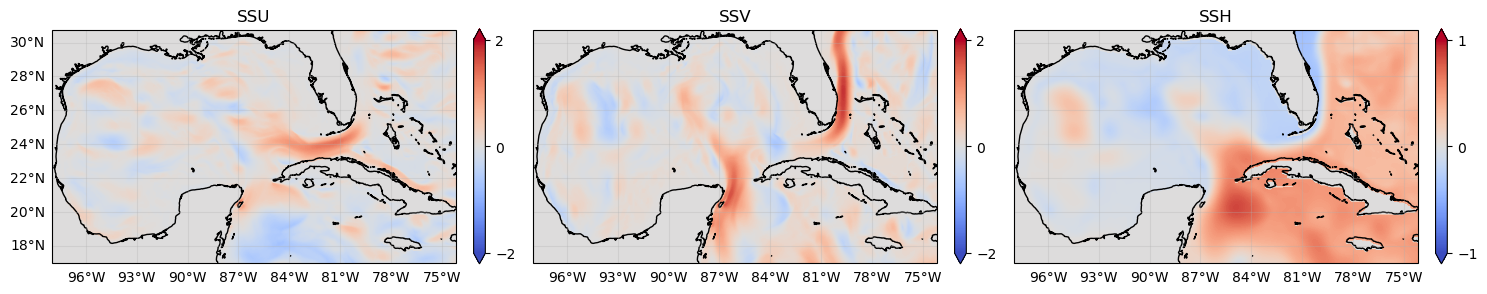

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Assuming channels are ["SSU", "SSV", "SSH"]
channels = ["SSU", "SSV", "SSH"]
channel_lims=[[-2,2],[-2,2],[-1,1]]
hrlr = 'hr'
time_step = 10
dataset = dataset
# If LR data
if hrlr == 'lr':
    loncoords = dataset.lrcoordmeshX[0,:]
    latcoords = dataset.lrcoordmeshY[:,0]
    preds = cond_input[time_step]
# If HR data
elif hrlr == 'hr':
    loncoords = dataset.hrcoordmeshX[0,:]
    latcoords = dataset.hrcoordmeshY[:,0]
    preds = im[time_step]

# Assuming preds is your prediction data (shape: [C, W, H])
# Example preds, loncoords, latcoords, and channel_lims data should be defined in your context
projection = ccrs.PlateCarree()

# Create a 1x3 subplot layout for each channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': projection})

for ivar, (var, lims) in enumerate(zip(channels, channel_lims), 0):
    # Plot each channel separately in the 1x3 grid
    im1 = axs[ivar].contourf(loncoords[:-4], latcoords[:-6], preds[ivar, :, :], 
                             levels=np.linspace(lims[0], lims[1], 200), 
                             vmin=lims[0], vmax=lims[1], transform=projection, 
                             cmap="coolwarm", extend='both')
    
    axs[ivar].coastlines()

    # Add colorbars for each subplot
    cbar = fig.colorbar(im1, ax=axs[ivar], orientation='vertical', 
                        ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04, shrink=0.5)

    # Add gridlines
    gl = axs[ivar].gridlines(draw_labels=True, alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False

    if ivar != 0:
        gl.left_labels = False

    axs[ivar].set_title(f"{var}")

plt.tight_layout()
plt.show()

In [16]:
loncoords[:-4].shape

(597,)

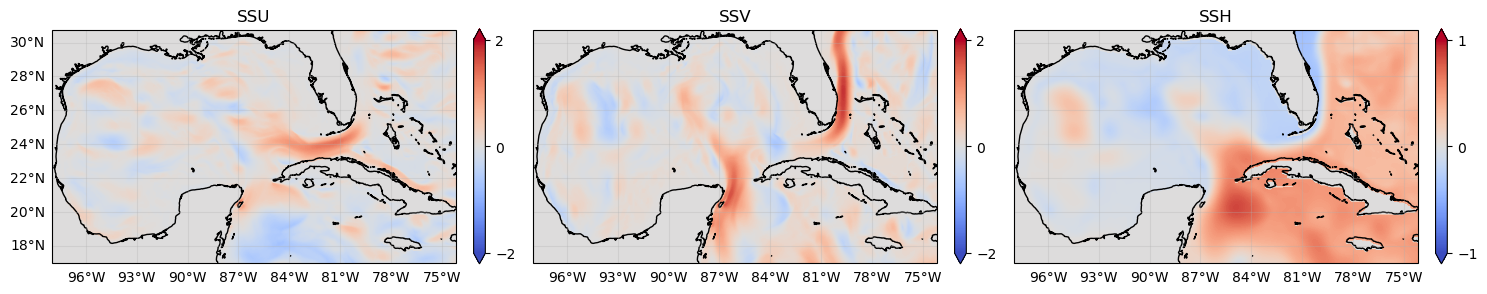

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Assuming channels are ["SSU", "SSV", "SSH"]
channels = ["SSU", "SSV", "SSH"]
channel_lims=[[-2,2],[-2,2],[-1,1]]
hrlr = 'hr'
time_step = 10
# If LR data
if hrlr == 'lr':
    loncoords = dataset.lrcoordmeshX[0,:]
    latcoords = dataset.lrcoordmeshY[:,0]
    preds = cond_input[time_step]
# If HR data
elif hrlr == 'hr':
    loncoords = dataset.hrcoordmeshX[0,:]
    latcoords = dataset.hrcoordmeshY[:,0]
    preds = im[time_step]

# Assuming preds is your prediction data (shape: [C, W, H])
# Example preds, loncoords, latcoords, and channel_lims data should be defined in your context
projection = ccrs.PlateCarree()

# Create a 1x3 subplot layout for each channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': projection})

for ivar, (var, lims) in enumerate(zip(channels, channel_lims), 0):
    # Plot each channel separately in the 1x3 grid
    im1 = axs[ivar].contourf(loncoords[:-4], latcoords[:-6], preds[ivar, :, :], 
                             levels=np.linspace(lims[0], lims[1], 200), 
                             vmin=lims[0], vmax=lims[1], transform=projection, 
                             cmap="coolwarm", extend='both')
    
    axs[ivar].coastlines()

    # Add colorbars for each subplot
    cbar = fig.colorbar(im1, ax=axs[ivar], orientation='vertical', 
                        ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04, shrink=0.5)

    # Add gridlines
    gl = axs[ivar].gridlines(draw_labels=True, alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False

    if ivar != 0:
        gl.left_labels = False

    axs[ivar].set_title(f"{var}")

plt.tight_layout()
plt.show()

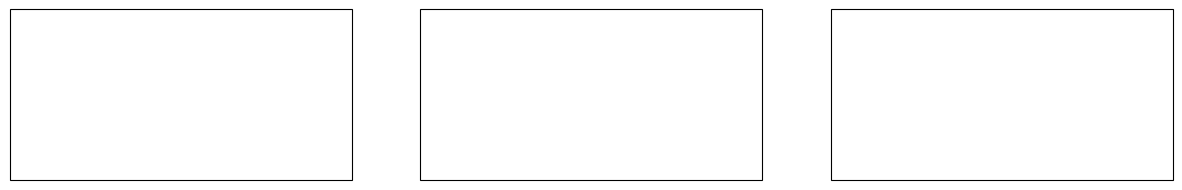

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.animation as animation

# Assuming channels are ["SSU", "SSV", "SSH"]
channels = ["SSU", "SSV", "SSH"]
channel_lims = [[-2, 2], [-2, 2], [-1, 1]]
hrlr = 'hr'

# Function to update the plot for each time step
def update_plot(time_step):
    # Clear the current plot for updating
    for ax in axs:
        ax.clear()

    # If LR data
    if hrlr == 'lr':
        loncoords = dataset.lrcoordmeshX[0, :]
        latcoords = dataset.lrcoordmeshY[:, 0]
        preds = cond_input[time_step]
    # If HR data
    elif hrlr == 'hr':
        loncoords = dataset.hrcoordmeshX[0, :]
        latcoords = dataset.hrcoordmeshY[:, 0]
        preds = im[time_step]

    # Update the plots for each channel
    for ivar, (var, lims) in enumerate(zip(channels, channel_lims), 0):
        im1 = axs[ivar].contourf(loncoords, latcoords, preds[ivar, :, :], 
                                 levels=np.linspace(lims[0], lims[1], 200), 
                                 vmin=lims[0], vmax=lims[1], transform=projection, 
                                 cmap="coolwarm", extend='both')
        
        axs[ivar].coastlines()

        # Add colorbars for each subplot
        cbar = fig.colorbar(im1, ax=axs[ivar], orientation='vertical', 
                            ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04)

        # Add gridlines
        gl = axs[ivar].gridlines(draw_labels=True, alpha=0.3)
        gl.top_labels = False
        gl.right_labels = False

        if ivar != 0:
            gl.left_labels = False

        axs[ivar].set_title(f"{var}")

    plt.tight_layout()

# Create a figure and 1x3 subplot layout for each channel
projection = ccrs.PlateCarree()
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': projection})

# Create animation
time_steps = range(0, 50)  # Adjust the range based on the number of time steps you have
ani = animation.FuncAnimation(fig, update_plot, frames=time_steps, repeat=False)

# Show the animation in an interactive window
plt.show()

Load VAE samples

In [24]:
import numpy as np
import os

path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples"
idx = 1

# Corrected 'with' statement to include 'as' and a variable to hold the data
with np.load(os.path.join(path, f'{idx}.npz')) as data:
    hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
    decoded_output_loaded = data['decoded_outputs']  # Shape depends on your data
    print(hres_loaded.shape)
    print(decoded_output_loaded.shape)



(8, 3, 342, 597)
(8, 3, 342, 597)


hres_loaded shape: (8, 3, 342, 597)
decoded_output_loaded shape: (8, 3, 342, 597)


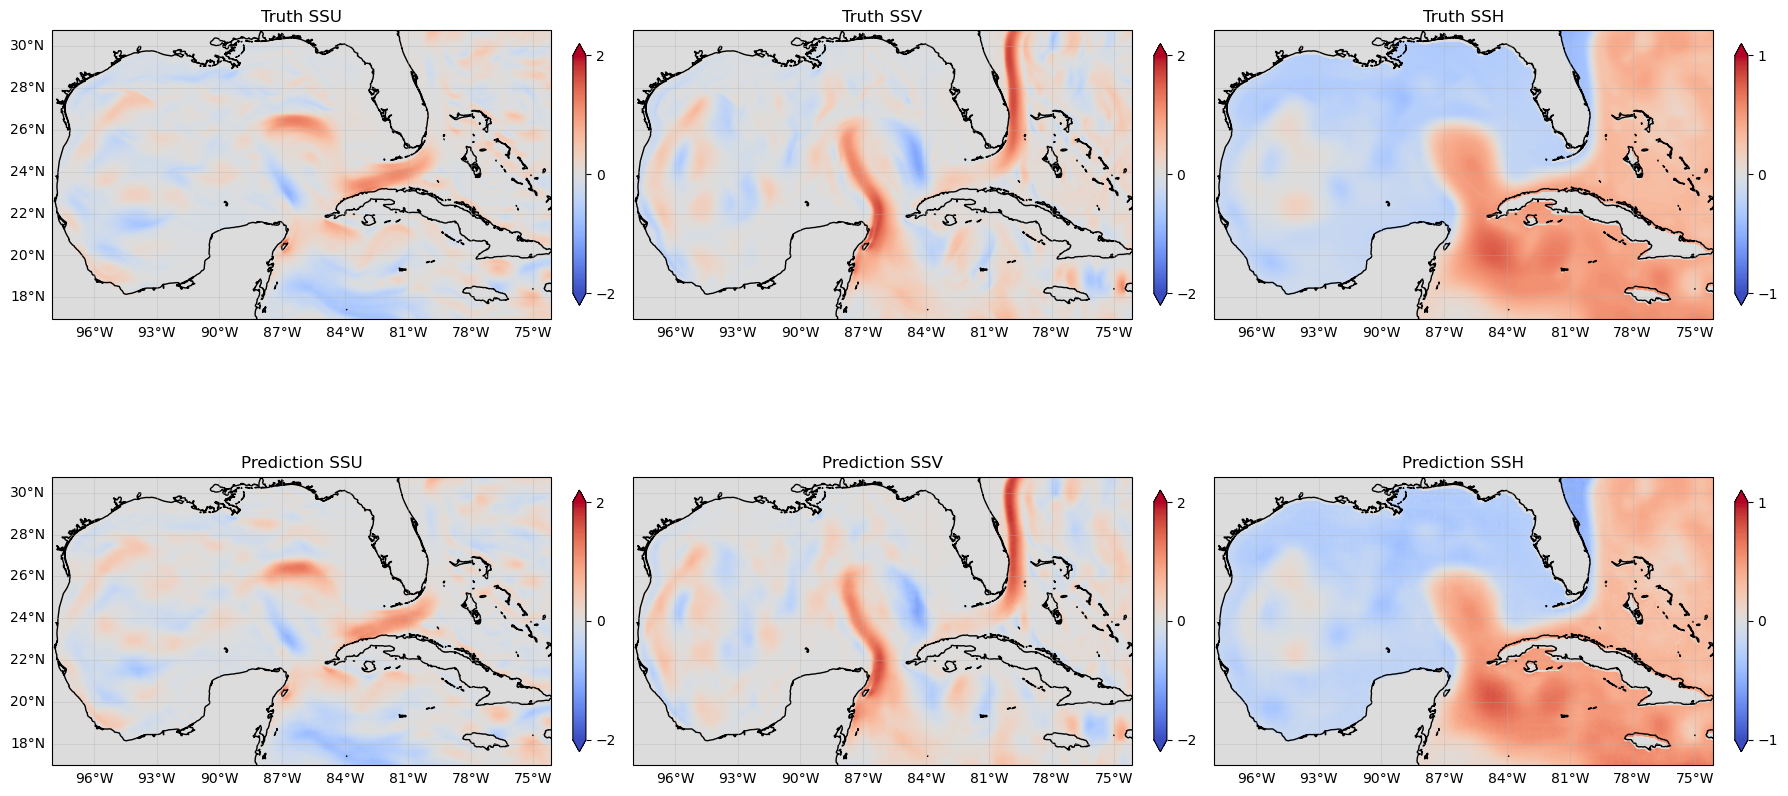

In [31]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load data
path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples"
idx = 50

with np.load(os.path.join(path, f'{idx}.npz')) as data:
    hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
    decoded_output_loaded = data['decoded_outputs']  # Adjust shape based on your data
    print('hres_loaded shape:', hres_loaded.shape)
    print('decoded_output_loaded shape:', decoded_output_loaded.shape)

# Select the sample index to visualize
sample_index = 2  # You can change this to visualize different samples

# Extract the sample data
hres_sample = hres_loaded[sample_index]  # Shape: [channels, height, width]

# Check if decoded_output_loaded has multiple ensembles
if len(decoded_output_loaded.shape) == 5:
    # If multiple ensembles, select one (e.g., the first one)
    num_samples = decoded_output_loaded.shape[0]
    decoded_sample = decoded_output_loaded[0, sample_index]  # Shape: [channels, height, width]
else:
    decoded_sample = decoded_output_loaded[sample_index]  # Shape: [channels, height, width]

# Define the channels and limits
channels = ["SSU", "SSV", "SSH"]
channel_lims = [[-2, 2], [-2, 2], [-1, 1]]

# Create longitude and latitude coordinates
# Replace these with your actual coordinates if available
height, width = hres_sample.shape[1], hres_sample.shape[2]
# loncoords = np.linspace(-180, 180, width)
# latcoords = np.linspace(-90, 90, height)

# Set up the plotting projection
projection = ccrs.PlateCarree()

# Create a figure with 2 rows (truth and model output) and 3 columns (channels)
fig, axs = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': projection})

# Function to plot data for a given sample and row index
def plot_sample(data_sample, row_index, title_prefix):
    for ivar, (var, lims) in enumerate(zip(channels, channel_lims)):
        im = axs[row_index, ivar].contourf(
            loncoords[:-4], latcoords[:-6], data_sample[ivar, :, :],
            levels=np.linspace(lims[0], lims[1], 200),
            vmin=lims[0], vmax=lims[1], transform=projection,
            cmap="coolwarm", extend='both'
        )

        axs[row_index, ivar].coastlines()

        cbar = fig.colorbar(
            im, ax=axs[row_index, ivar], orientation='vertical',
            ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04, shrink=0.5
        )

        gl = axs[row_index, ivar].gridlines(draw_labels=True, alpha=0.3)
        gl.top_labels = False
        gl.right_labels = False

        if ivar != 0:
            gl.left_labels = False

        axs[row_index, ivar].set_title(f"{title_prefix} {var}")

# Plot the ground truth data
plot_sample(hres_sample, row_index=0, title_prefix="Truth")

# Plot the model output data
# plot_sample(decoded_sample, row_index=1, title_prefix="Model Output")

plot_sample(decoded_sample, row_index=1, title_prefix='Prediction')

plt.tight_layout()
plt.show()

Calculate the spectrums

In [18]:
from scipy import fft  
spectrum_pred = np.abs(fft.rfft(decoded_output_loaded, axis = 3)).mean(axis = 2)
spectrum_truth = np.abs(fft.rfft(hres_loaded, axis = 3)).mean(axis = 2)
ks = np.arange(1, spectrum_pred.shape[2])

In [17]:
spectrum_pred.shape

(8, 3, 305)

hres_loaded shape: (8, 3, 342, 597)
decoded_output_loaded shape: (8, 3, 342, 597)


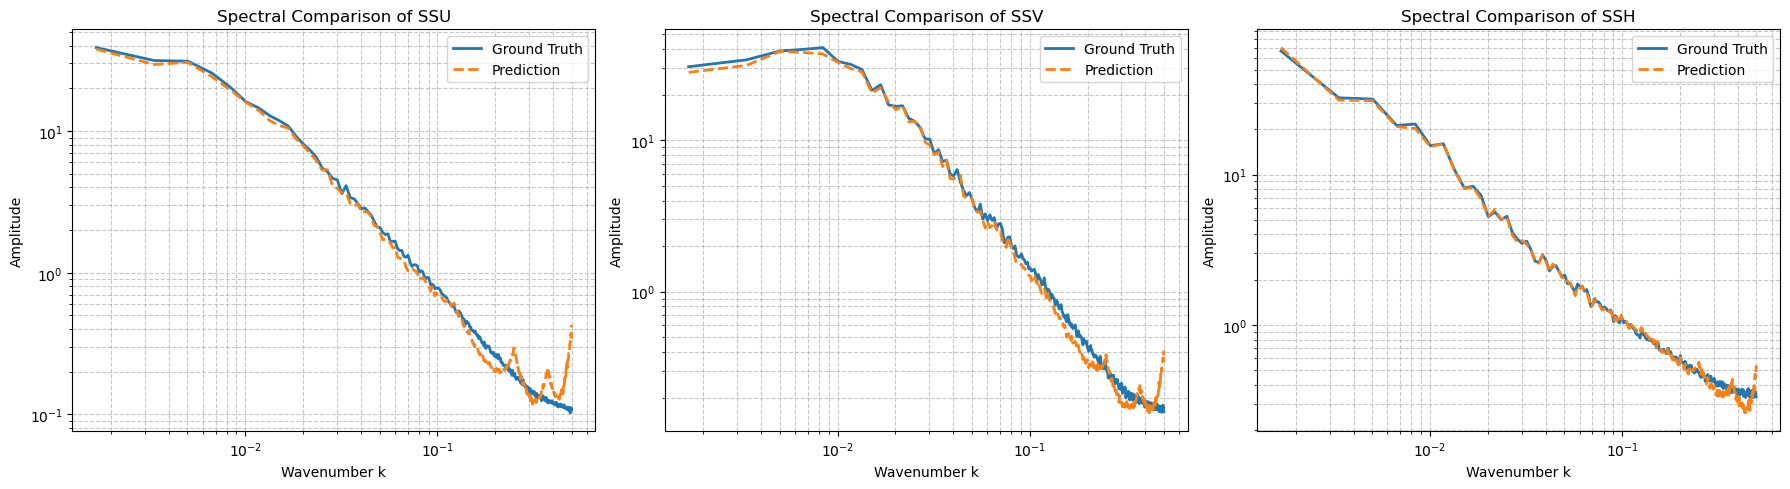

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
import os

# Load your data (adjust the path and file index as needed)
path = path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples"
idx = 1

with np.load(os.path.join(path, f'{idx}.npz')) as data:
    hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
    decoded_output_loaded = data['decoded_outputs']  # Shape: [batch_size, channels, height, width]
    print('hres_loaded shape:', hres_loaded.shape)
    print('decoded_output_loaded shape:', decoded_output_loaded.shape)

# Compute the spectra
spectrum_pred = np.abs(fft.rfft(decoded_output_loaded, axis=3)).mean(axis=2)  # Average over height
spectrum_truth = np.abs(fft.rfft(hres_loaded, axis=3)).mean(axis=2)          # Average over height

# Average over the batch dimension
spectrum_pred_mean = spectrum_pred.mean(axis=0)   # Shape: [channels, n_freqs]
spectrum_truth_mean = spectrum_truth.mean(axis=0) # Shape: [channels, n_freqs]

# Define the spatial resolution (adjust if necessary)
dx = 1  # Spatial resolution along the width; change this if you have a different spatial resolution

# Number of points along the width
n = decoded_output_loaded.shape[3]

# Compute the wavenumbers using fft.rfftfreq
freqs = fft.rfftfreq(n, d=dx)

# Exclude the zero frequency (if desired)
ks = freqs[1:]
spectrum_pred_mean = spectrum_pred_mean[:, 1:]
spectrum_truth_mean = spectrum_truth_mean[:, 1:]

# Define channel names
channels = ["SSU", "SSV", "SSH"]

# Plot the spectra
plt.figure(figsize=(18, 5))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1)
    plt.loglog(ks, spectrum_truth_mean[i], label='Ground Truth', linewidth=2)
    plt.loglog(ks, spectrum_pred_mean[i], label='Prediction', linestyle='--', linewidth=2)
    plt.xlabel('Wavenumber k')
    plt.ylabel('Amplitude')
    plt.title(f'Spectral Comparison of {channel}')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)

plt.tight_layout()
plt.show()

KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9131.npz' with keys: hres, output)
Processed batch 9132/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9132.npz' with keys: hres, output)
Processed batch 9133/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9133.npz' with keys: hres, output)
Processed batch 9134/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9134.npz' with keys: hres, output)
Processed batch 9135/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9135.npz' with keys: hres, output)
Processed batch 9136/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9136.npz' with keys: hres, output)
Processed batch 9137/100
KeysView(NpzFile '/media/volume/mo

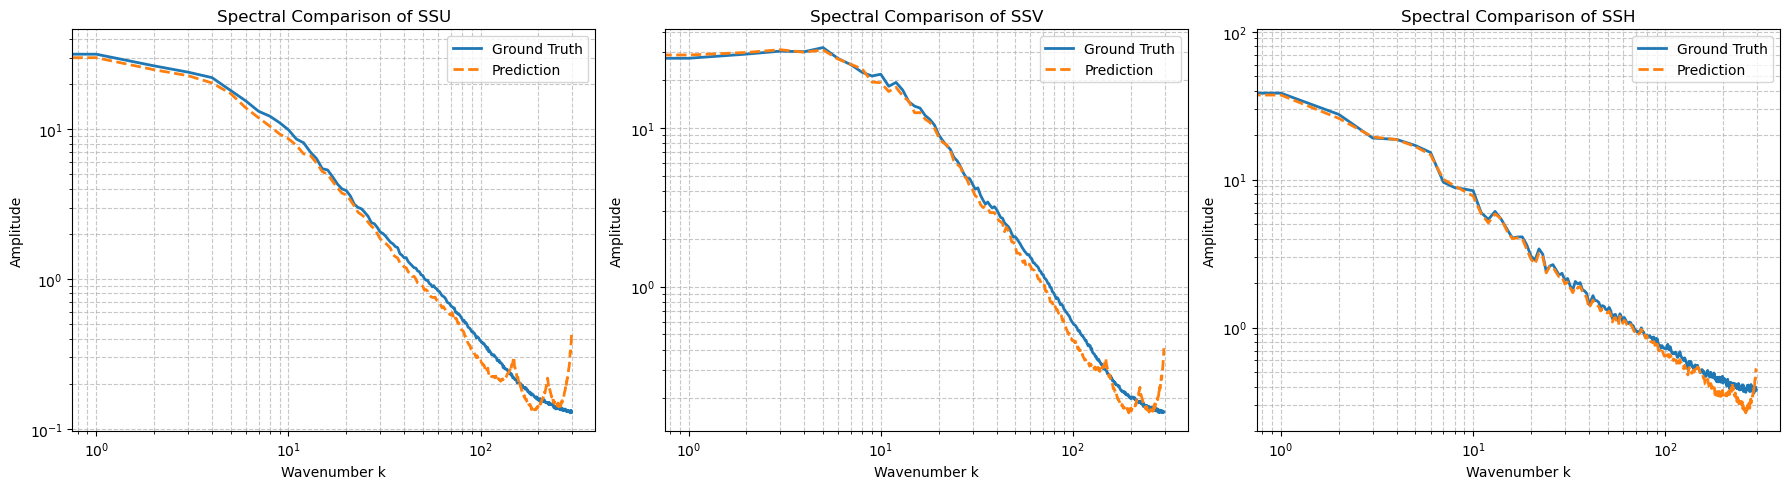

In [5]:
import numpy as np
import os
from scipy import fft
import matplotlib.pyplot as plt

# Initialize accumulators
total_spectrum_pred = None  # Will hold the sum of predicted spectra
total_spectrum_truth = None  # Will hold the sum of ground truth spectra
total_samples = 0  # Total number of samples processed

# Define the spatial resolution (adjust if necessary)
dx = 1  # Spatial resolution along the width; change this if you have a different spatial resolution

# Path to the directory containing the .npz files
path = path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm"

# Number of batches
num_batches = 100  # Adjust this to the actual number of batches you have

# Loop over all batch indices
for idx in range(9131, 9131+num_batches):
    # Load the data for the current batch
    file_path = os.path.join(path, f'ldm_{idx}.npz')
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist. Skipping.")
        continue  # Skip if the file does not exist

    with np.load(file_path) as data:
        print(data.keys())  
        hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
        decoded_output_loaded = data['output']  # Shape: [batch_size, channels, height, width] or [num_samples, batch_size, channels, height, width]


    # Handle multiple ensembles if necessary
    if decoded_output_loaded.ndim == 5:
        # If multiple ensembles, average over ensembles
        decoded_output_loaded = decoded_output_loaded.mean(axis=0)  # Now shape is [batch_size, channels, height, width]

    # Compute the spectra along the width (axis=3)
    spectrum_pred = np.abs(fft.rfft(decoded_output_loaded, axis=3)).mean(axis=2)  # Average over height
    spectrum_truth = np.abs(fft.rfft(hres_loaded, axis=3)).mean(axis=2)          # Average over height

    # Accumulate the spectra and sample count
    if total_spectrum_pred is None:
        # Initialize the accumulators with the spectra from the first batch
        total_spectrum_pred = spectrum_pred.sum(axis=0)   # Sum over batch dimension
        total_spectrum_truth = spectrum_truth.sum(axis=0) # Sum over batch dimension
    else:
        # Accumulate the sums
        total_spectrum_pred += spectrum_pred.sum(axis=0)
        total_spectrum_truth += spectrum_truth.sum(axis=0)

    # Update the total number of samples processed
    total_samples += hres_loaded.shape[0]

    print(f"Processed batch {idx+1}/{num_batches}")

# Compute the mean spectra over all samples
mean_spectrum_pred = total_spectrum_pred / total_samples  # Shape: [channels, n_freqs]
mean_spectrum_truth = total_spectrum_truth / total_samples  # Shape: [channels, n_freqs]

# Number of points along the width (assuming all batches have the same width)
n = hres_loaded.shape[3]

# Compute the wavenumbers using fft.rfftfreq
freqs = fft.rfftfreq(n, d=dx)

# Exclude the zero frequency (if desired)
ks = freqs[1:]
mean_spectrum_pred = mean_spectrum_pred[:, 1:]
mean_spectrum_truth = mean_spectrum_truth[:, 1:]

# Define channel names
channels = ["SSU", "SSV", "SSH"]

# Plot the spectra
plt.figure(figsize=(18, 5))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1)
    # plt.plot(ks, mean_spectrum_truth[i], label='Ground Truth', linewidth=2)
    # plt.plot(ks, mean_spectrum_pred[i], label='Prediction', linestyle='--', linewidth=2)
    plt.plot(mean_spectrum_truth[i], label='Ground Truth', linewidth=2)
    plt.plot(mean_spectrum_pred[i], label='Prediction', linestyle='--', linewidth=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Wavenumber k')
    plt.ylabel('Amplitude')
    plt.title(f'Spectral Comparison of {channel}')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
import numpy as np
import os

# Number of channels
num_channels = 3  # Assuming channels are ["SSU", "SSV", "SSH"]

# Initialize accumulators for each channel
sum_x = np.zeros(num_channels)
sum_y = np.zeros(num_channels)
sum_x2 = np.zeros(num_channels)
sum_y2 = np.zeros(num_channels)
sum_xy = np.zeros(num_channels)
n = np.zeros(num_channels)  # Total number of data points per channel

# Path to the directory containing the .npz files
path = path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm"

# Number of batches
num_batches = 100  # Adjust this to the actual number of batches you have

# Loop over all batch indices
for idx in range(9131, 9131+num_batches):
    # Load the data for the current batch
    file_path = os.path.join(path, f'ldm_{idx}.npz')
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist. Skipping.")
        continue  # Skip if the file does not exist

    with np.load(file_path) as data:
        hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
        decoded_output_loaded = data['output']  # Adjust shape based on your data

    # Handle multiple ensembles if necessary
    if decoded_output_loaded.ndim == 5:
        # If multiple ensembles, average over ensembles
        decoded_output_loaded = decoded_output_loaded.mean(axis=0)  # Now shape is [batch_size, channels, height, width]

    # Reshape data to [batch_size, channels, height * width]
    batch_size, num_channels, height, width = hres_loaded.shape

    hres_flat = hres_loaded.reshape(batch_size, num_channels, -1)
    decoded_flat = decoded_output_loaded.reshape(batch_size, num_channels, -1)

    # Accumulate statistics for each channel
    for ch in range(num_channels):
        x = decoded_flat[:, ch, :].ravel()  # Flatten to 1D array
        y = hres_flat[:, ch, :].ravel()     # Flatten to 1D array

        sum_x[ch] += np.sum(x)
        sum_y[ch] += np.sum(y)
        sum_x2[ch] += np.sum(x ** 2)
        sum_y2[ch] += np.sum(y ** 2)
        sum_xy[ch] += np.sum(x * y)
        n[ch] += x.size  # x.size should be equal to y.size

    print(f"Processed batch {idx+1}/{num_batches}")

# Initialize array to store correlation coefficients
corr_coefficients = np.zeros(num_channels)

for ch in range(num_channels):
    numerator = n[ch] * sum_xy[ch] - sum_x[ch] * sum_y[ch]
    denominator = np.sqrt((n[ch] * sum_x2[ch] - sum_x[ch] ** 2) * (n[ch] * sum_y2[ch] - sum_y[ch] ** 2))
    if denominator != 0:
        corr_coefficients[ch] = numerator / denominator
    else:
        corr_coefficients[ch] = np.nan  # Handle division by zero

# Print the correlation coefficients
channels = ["SSU", "SSV", "SSH"]
for ch in range(num_channels):
    print(f"Correlation coefficient for {channels[ch]}: {corr_coefficients[ch]:.4f}")

Processed batch 9132/100
Processed batch 9133/100
Processed batch 9134/100
Processed batch 9135/100
Processed batch 9136/100
Processed batch 9137/100
Processed batch 9138/100
Processed batch 9139/100
Processed batch 9140/100
Processed batch 9141/100
Processed batch 9142/100
Processed batch 9143/100
Processed batch 9144/100
Processed batch 9145/100
Processed batch 9146/100
Processed batch 9147/100
Processed batch 9148/100
Processed batch 9149/100
Processed batch 9150/100
Processed batch 9151/100
Processed batch 9152/100
Processed batch 9153/100
Processed batch 9154/100
Processed batch 9155/100
Processed batch 9156/100
Processed batch 9157/100
Processed batch 9158/100
Processed batch 9159/100
Processed batch 9160/100
Processed batch 9161/100
Processed batch 9162/100
Processed batch 9163/100
Processed batch 9164/100
Processed batch 9165/100
Processed batch 9166/100
Processed batch 9167/100
Processed batch 9168/100
Processed batch 9169/100
Processed batch 9170/100
Processed batch 9171/100


For DDPM

hres_loaded shape: (1, 3, 342, 597)
decoded_output_loaded shape: (1, 3, 342, 597)


NameError: name 'loncoords' is not defined

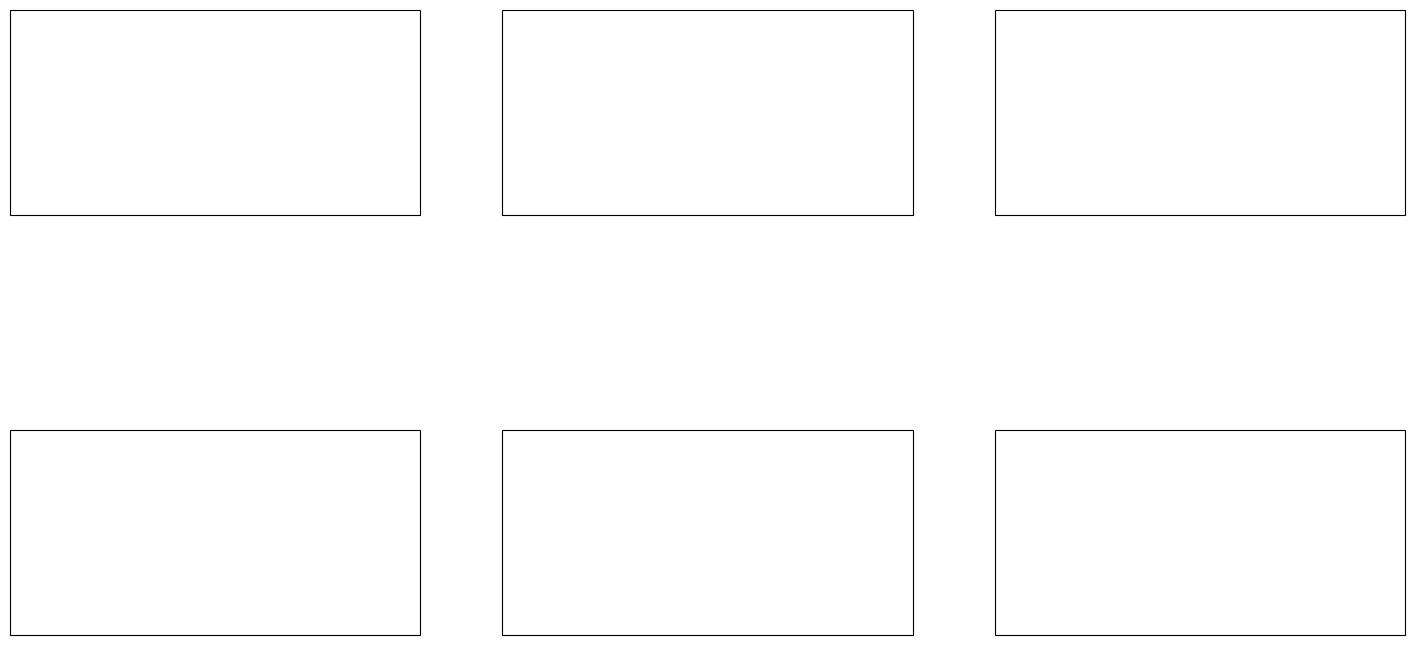

In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load data
path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm"
idx = 9140

with np.load(os.path.join(path, f'ldm_{idx}.npz')) as data:
    hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
    decoded_output_loaded = data['output']  # Adjust shape based on your data
    print('hres_loaded shape:', hres_loaded.shape)
    print('decoded_output_loaded shape:', decoded_output_loaded.shape)

# Select the sample index to visualize
sample_index = 0  # You can change this to visualize different samples

# Extract the sample data
hres_sample = hres_loaded[sample_index]  # Shape: [channels, height, width]

# Check if decoded_output_loaded has multiple ensembles
if len(decoded_output_loaded.shape) == 5:
    # If multiple ensembles, select one (e.g., the first one)
    num_samples = decoded_output_loaded.shape[0]
    decoded_sample = decoded_output_loaded[0, sample_index]  # Shape: [channels, height, width]
else:
    decoded_sample = decoded_output_loaded[sample_index]  # Shape: [channels, height, width]

# Define the channels and limits
channels = ["SSU", "SSV", "SSH"]
channel_lims = [[-2, 2], [-2, 2], [-1, 1]]

# Create longitude and latitude coordinates
# Replace these with your actual coordinates if available
height, width = hres_sample.shape[1], hres_sample.shape[2]
# loncoords = np.linspace(-180, 180, width)
# latcoords = np.linspace(-90, 90, height)

# Set up the plotting projection
projection = ccrs.PlateCarree()

# Create a figure with 2 rows (truth and model output) and 3 columns (channels)
fig, axs = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': projection})

# Function to plot data for a given sample and row index
def plot_sample(data_sample, row_index, title_prefix):
    for ivar, (var, lims) in enumerate(zip(channels, channel_lims)):
        im = axs[row_index, ivar].contourf(
            # loncoords, latcoords, data_sample[ivar, 2:-2, 3:-4],
            loncoords, latcoords, data_sample[ivar, :, :],
            levels=np.linspace(lims[0], lims[1], 200),
            vmin=lims[0], vmax=lims[1], transform=projection,
            cmap="coolwarm", extend='both'
        )

        axs[row_index, ivar].coastlines()

        cbar = fig.colorbar(
            im, ax=axs[row_index, ivar], orientation='vertical',
            ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04, shrink=0.5
        )

        gl = axs[row_index, ivar].gridlines(draw_labels=True, alpha=0.3)
        gl.top_labels = False
        gl.right_labels = False

        if ivar != 0:
            gl.left_labels = False

        axs[row_index, ivar].set_title(f"{title_prefix} {var}")

# Plot the ground truth data
plot_sample(hres_sample, row_index=0, title_prefix="Truth")

# Plot the model output data
# plot_sample(decoded_sample, row_index=1, title_prefix="Model Output")

plot_sample(decoded_sample, row_index=1, title_prefix='Prediction')

plt.tight_layout()
plt.show()

Processed batch 1/50
Processed batch 2/50
Processed batch 3/50
Processed batch 4/50
Processed batch 5/50
Processed batch 6/50
Processed batch 7/50
Processed batch 8/50
Processed batch 9/50
Processed batch 10/50
Processed batch 11/50
Processed batch 12/50
Processed batch 13/50
Processed batch 14/50
Processed batch 15/50
Processed batch 16/50
Processed batch 17/50
Processed batch 18/50
Processed batch 19/50
Processed batch 20/50
Processed batch 21/50
Processed batch 22/50
Processed batch 23/50
Processed batch 24/50
Processed batch 25/50
Processed batch 26/50
Processed batch 27/50
Processed batch 28/50
Processed batch 29/50
Processed batch 30/50
Processed batch 31/50
Processed batch 32/50
Processed batch 33/50
Processed batch 34/50
Processed batch 35/50
Processed batch 36/50
Processed batch 37/50
Processed batch 38/50
Processed batch 39/50
Processed batch 40/50
Processed batch 41/50
Processed batch 42/50
Processed batch 43/50
Processed batch 44/50
Processed batch 45/50
Processed batch 46/

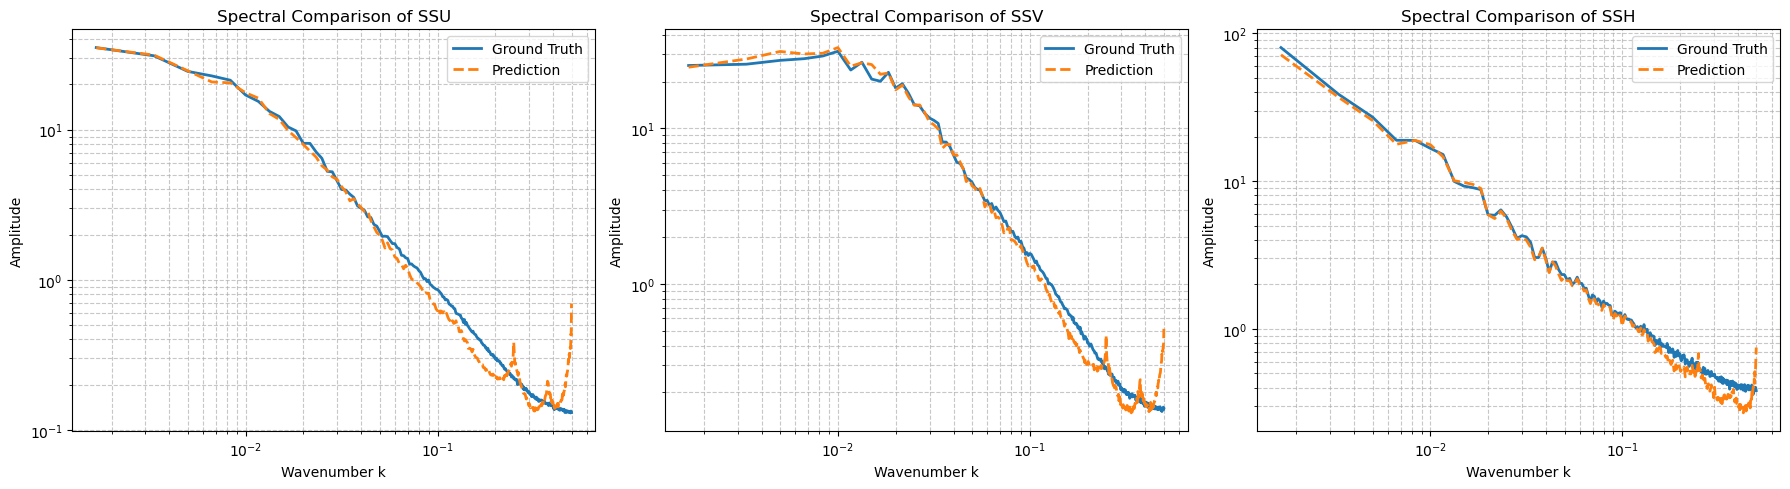

In [25]:
import numpy as np
import os
from scipy import fft
import matplotlib.pyplot as plt

# Initialize accumulators
total_spectrum_pred = None  # Will hold the sum of predicted spectra
total_spectrum_truth = None  # Will hold the sum of ground truth spectra
total_samples = 0  # Total number of samples processed

# Define the spatial resolution (adjust if necessary)
dx = 1  # Spatial resolution along the width; change this if you have a different spatial resolution

# Path to the directory containing the .npz files
path = path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v2/samples"

# Number of batches
num_batches = 50  # Adjust this to the actual number of batches you have

# Loop over all batch indices
for idx in range(num_batches):
    # Load the data for the current batch
    file_path = os.path.join(path, f'ldm_{idx+9131}.npz')
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist. Skipping.")
        continue  # Skip if the file does not exist

    with np.load(file_path) as data:
        hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
        decoded_output_loaded = data['output'][...,2:-2, 3:-4]  # Shape: [batch_size, channels, height, width] or [num_samples, batch_size, channels, height, width]

    # Handle multiple ensembles if necessary
    if decoded_output_loaded.ndim == 5:
        # If multiple ensembles, average over ensembles
        decoded_output_loaded = decoded_output_loaded.mean(axis=0)  # Now shape is [batch_size, channels, height, width]

    # Compute the spectra along the width (axis=3)
    spectrum_pred = np.abs(fft.rfft(decoded_output_loaded, axis=3)).mean(axis=2)  # Average over height
    spectrum_truth = np.abs(fft.rfft(hres_loaded, axis=3)).mean(axis=2)          # Average over height

    # Accumulate the spectra and sample count
    if total_spectrum_pred is None:
        # Initialize the accumulators with the spectra from the first batch
        total_spectrum_pred = spectrum_pred.sum(axis=0)   # Sum over batch dimension
        total_spectrum_truth = spectrum_truth.sum(axis=0) # Sum over batch dimension
    else:
        # Accumulate the sums
        total_spectrum_pred += spectrum_pred.sum(axis=0)
        total_spectrum_truth += spectrum_truth.sum(axis=0)

    # Update the total number of samples processed
    total_samples += hres_loaded.shape[0]

    print(f"Processed batch {idx+1}/{num_batches}")

# Compute the mean spectra over all samples
mean_spectrum_pred = total_spectrum_pred / total_samples  # Shape: [channels, n_freqs]
mean_spectrum_truth = total_spectrum_truth / total_samples  # Shape: [channels, n_freqs]

# Number of points along the width (assuming all batches have the same width)
n = hres_loaded.shape[3]

# Compute the wavenumbers using fft.rfftfreq
freqs = fft.rfftfreq(n, d=dx)

# Exclude the zero frequency (if desired)
ks = freqs[1:]
mean_spectrum_pred = mean_spectrum_pred[:, 1:]
mean_spectrum_truth = mean_spectrum_truth[:, 1:]

# Define channel names
channels = ["SSU", "SSV", "SSH"]

# Plot the spectra
plt.figure(figsize=(18, 5))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1)
    plt.loglog(ks, mean_spectrum_truth[i], label='Ground Truth', linewidth=2)
    plt.loglog(ks, mean_spectrum_pred[i], label='Prediction', linestyle='--', linewidth=2)
    plt.xlabel('Wavenumber k')
    plt.ylabel('Amplitude')
    plt.title(f'Spectral Comparison of {channel}')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [14]:
# from dataset.utilities import FTDataset

import torch
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import pickle
class FTDataset(Dataset):
    # Dataset for fine-tuning the model
    def __init__(self, data_path):
        # Load data from pickle
        with open(data_path, 'rb') as f:
            self.data = pickle.load(f)
        
        # Determine the number of data points
        self.num_samples = self.data['fcpreds_interp_ma'].shape[0]
    
    def __len__(self):
        return self.num_samples
    
    def __getitem__(self, idx):
        # Fetch data for the specified index
        lrv = self.data['fcpreds_interp_ma'][idx, :, :, :]
        hrv = self.data['hr_ma'][idx, :, :, :]
        
        # Convert to torch tensors
        lrv_tensor = torch.tensor(lrv, dtype=torch.float32).permute(2, 0, 1)
        hrv_tensor = torch.tensor(hrv, dtype=torch.float32).permute(2, 0, 1)
        
        return lrv_tensor, hrv_tensor
    

ft = FTDataset(data_path="/home/exouser/qgm1/fujitsu_data/curated_data/ft1/ft_data_dict.pkl")
dl_ft = DataLoader(ft, batch_size=8, shuffle=False)
for batch_idx, data in enumerate(tqdm(dl_ft)):
    cond_input = None
    cond_input, im = data
    print(cond_input.shape)
    print(im.shape)
    break

  0%|          | 0/92 [00:00<?, ?it/s]

torch.Size([8, 3, 342, 597])
torch.Size([8, 3, 342, 597])


In [10]:
data_path="/home/exouser/qgm1/fujitsu_data/curated_data/ft1/ft_data_dict.pkl"
import pickle

with open(data_path, 'rb') as f:

    data = pickle.load(f)
    
    data.keys()


In [ ]:
data_path="/home/exouser/qgm1/fujitsu_data/curated_data/ft1/ft_data_dict.pkl"

import pickle
import numpy as np
